## 9-7. 프로젝트: 인물 모드 문제점 찾기

### 라이브러리 버전 확인

In [21]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

import os
import urllib
import cv2
from matplotlib import pyplot as plt
from pixellib.semantic import semantic_segmentation
import numpy as np
from PIL import Image


### Step 1. 인물모드 직접 해 보기
------------------------------
- 최소 3장 이상 셀카로 직접 인물사진 구현해보기
- 인물이 주인공이 아닌 사진도 시도해보자
- 배경을 블러처리 뿐만 아니라 크로마키처럼 다른 배경으로 바꾸는 것도 시도해보자

In [2]:
# segmentation 모델 가져오기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) 
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f1b9ed8f2b0>)

__내 사진으로 인물사진 구현해보기__

In [93]:
from pixellib.semantic import semantic_segmentation
# semantic segmentation 모델 선언
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
segvalues, output = model.segmentAsPascalvoc(img_path) 

(480, 720, 3)


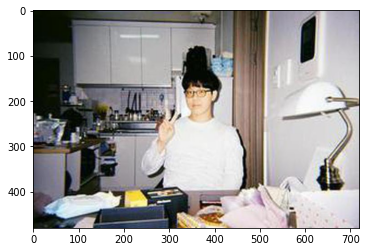

In [96]:
# 사진 불러오기
img_path = 'data/필름사진.jpg'
# img_path = 'data/크로마키.jpg'
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [98]:
# 자연배경과 사람만 인지되었다.
segvalues["class_ids"]

array([ 0, 15])

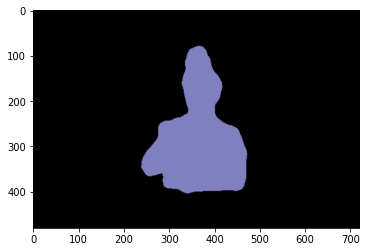

In [83]:
# 세그먼트 결과물
plt.imshow(output)
plt.show()

In [84]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [85]:
seg_color = tuple([colormap[15][i] for i in [2,1,0]]) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color

(128, 128, 192)

(480, 720)


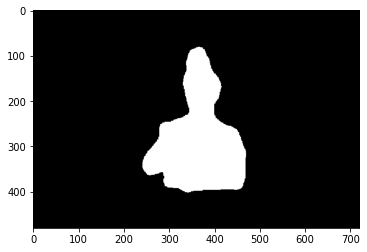

In [86]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

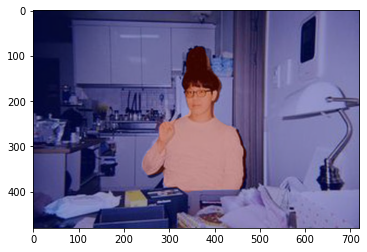

In [87]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

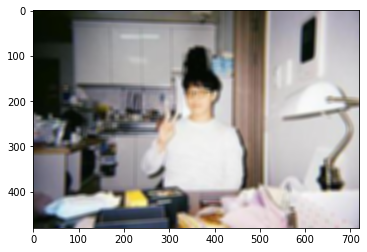

In [88]:
img_orig_blur = cv2.blur(img_orig, (10,10))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

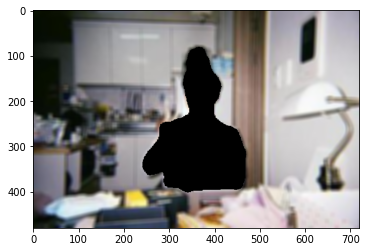

In [89]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

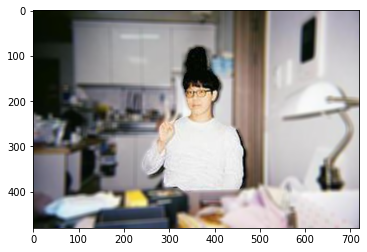

In [90]:

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 함수화 하기

In [70]:
# 리사이즈 해주는 함수
def resize_images(img_path):

    target_size=(720,480)
    
    old_img=Image.open(img_path)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img_path, "JPEG")
    img_orig = cv2.imread(img_path)
    return img_orig


def selectivefocus(img_path = img_path, x=15):
    # 사진 로드하기
    img_path = img_path 
    img_orig = resize_images(img_path)
    
    # 모델 로드하기
    model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
    model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
    segvalues, output = model.segmentAsPascalvoc(img_path) 
    
    #컬러맵 만들기 
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3   
    seg_color = tuple([colormap[x][i] for i in [2,1,0]])
    
    # 컬러맵으로 윤곽 따기
    seg_map = np.all(output==seg_color, axis=-1) 
    
    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()

    # 컬러맵을 각각 255과 0으로(흑백) 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    
    # 블러 처리
    img_orig_blur = cv2.blur(img_orig, (10,10))
    
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    # 원래 이미지와 블러처리된 이미지 합치기
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    
    plt.show()


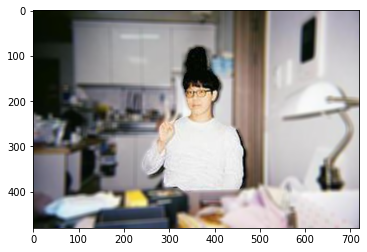

In [69]:
# 사람은 x=15
img_path = 'data/필름사진.jpg'
selectivefocus(img_path = img_path,x = 15)

__동물사진__

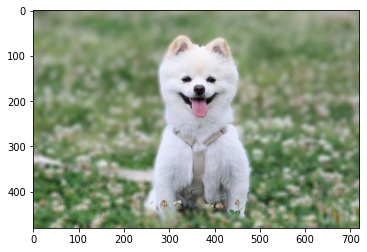

In [72]:
# 강아지는 12
img_path = 'data/dog.jpg'
selectivefocus(img_path = img_path, x = 12)

__크로마키__

In [102]:
# 리사이즈 해주는 함수
def resize_images(img_path):

    target_size=(720,480)
    
    old_img=Image.open(img_path)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img_path, "JPEG")
    img_orig = cv2.imread(img_path)
    return img_orig


def selectivefocus(img_path, img_path2, x):
    # 사진 로드하기
    img_path = img_path 
    img_orig = resize_images(img_path)
    img_orig2 = resize_images(img_path2)
    
    # 모델 로드하기
    model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
    model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
    segvalues, output = model.segmentAsPascalvoc(img_path) 
    
    #컬러맵 만들기 
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3   
    seg_color = tuple([colormap[x][i] for i in [2,1,0]])
    
    # 컬러맵으로 윤곽 따기
    seg_map = np.all(output==seg_color, axis=-1) 
    
    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()

    # 컬러맵을 각각 255과 0으로(흑백) 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    
    # 블러 처리
    img_orig_blur2 = cv2.blur(img_orig2, (10,10))
    
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(img_orig_blur2, img_bg_mask)
    
    # 원래 이미지와 블러처리된 이미지 합치기
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    
    plt.show()


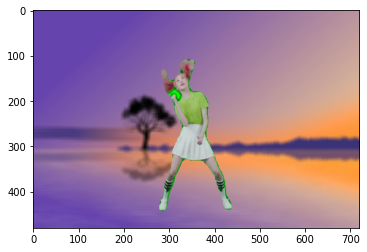

In [103]:
# 크로마키
img_path = 'data/크로마키.jpg'
img_path2 = 'data/자연.jpg'
selectivefocus(img_path, img_path2, x = 15)

### Step 2. 사진에서 문제점 찾기
--------------------------
- 위의 작업에서는 문제가 있다. 
- 인물 주변 배경은 블러처리가 안된다거나 하는 문제가 발생

__문제점__
1. 사진 뒤에 *에어프라이기*가 사람이랑 겹쳐서 머리카락으로 인식되어서 블러처리가 안 된것 같다.
1. 안 된줄 알았는데  자세히 보니 되었다. 
1. 분명 사람이랑 배경 구분할때는 사람이랑 에어프라이기가 같이 분리되었는데 분리할때는 사람만 잘 분리되었다. 
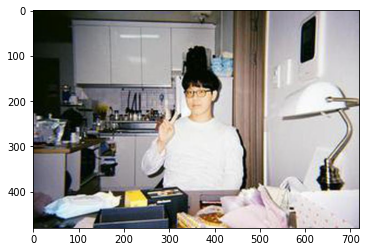
                                                                  <원본사진>
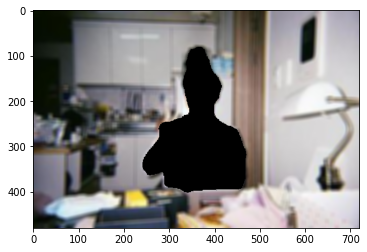
                                                              <인물배경분리 사진>
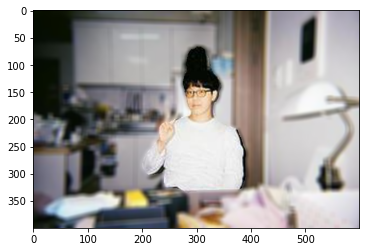
                                                                  <합성사진>  

### Step 3. 해결 방법을 제안해 보기
---------------------------------------
__세그멘테이션의 한계__   
Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인.  
피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에   
초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation)   
하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘듬

- 아웃포커싱 하는법 : https://m.blog.naver.com/typs6301/222172333739
- 얕은 피사계 심도 이해 : https://www.adobe.com/kr/creativecloud/photography/discover/shallow-depth-of-field.html


- 3D 이미지 센서 : https://news.skhynix.co.kr/post/next-gen-3d


- 소프트웨어 기술 : https://sites.google.com/view/struct2depth

## 회고
------------------------------
1. 인물사진을 만드는 원리가 인물을 분리하고 블러처리한다음에 다시 합성하는 방법이라는 것을 알게되었다. 
1. 이 원리를 활용해 크로마키를 배경으로 촬영된 사진과 다른 배경사진을 합성하는 바